In [1]:
import nltk
import pandas as pd
import tensorflow as tf
import numpy as np
import sklearn
import langid
import matplotlib.pyplot as plt
import fasttext

In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer, SpanishStemmer

In [3]:
#Load documents in fasttext format
raw_train = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\train.ft.txt"
raw_test = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\test.ft.txt"

In [4]:
langid.set_languages(['en','es'])  # ISO 639-1 codes
EngStemmer = EnglishStemmer()
EngStops = set(stopwords.words('english'))

EspStemmer = SpanishStemmer()
EspStops = set(stopwords.words('spanish'))

In [ ]:
from tqdm import tqdm.notebook.tqdm as tqdm
import mmap

def get_num_lines(file_path):
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines

In [25]:
#Expect precision and recall of 0.916 if all is in order for full train
#Throwout reviews with encoding errors

count = 0
f_train = open(raw_train, 'r')
out_train = open('C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_train.txt', 'w')

for i in tqdm(range(get_num_lines(raw_train))):
    try:
        line = f_train.readline()
        lang = langid.classify(line)[0]
        if not line:
            break
        line = line.split(" ", 1)
        line[1] = word_tokenize(line[1])
        if lang == 'en':
            line[1] = " ".join([EngStemmer.stem(w) for w in line[1] if (w.isalpha() and w not in EngStops)])
        else:
            line[1] = " ".join([EspStemmer.stem(w) for w in line[1] if (w.isalpha() and w not in EspStops)])
        out_train.write(line[0] + " " + line[1] + "\n")
    except Exception as e:
        count += 1
        continue
f_train.close()
out_train.close()
print("Exceptions in train set: " + str(count))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 3594045/3600000 [1:48:20<00:10, 552.86it/s]

Exceptions in train set: 331


In [26]:
count = 0
f_test = open(raw_test, 'r')
out_test = open('C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_test.txt', 'w')

for i in tqdm(range(get_num_lines(raw_test))):
    try:
        line = f_test.readline()
        lang = langid.classify(line)[0]
        if not line:
            break
        line = line.split(" ", 1)
        line[1] = word_tokenize(line[1])
        if lang == 'en':
            line[1] = " ".join([EngStemmer.stem(w) for w in line[1] if (w.isalpha() and w not in EngStops)])
        else:
            line[1] = " ".join([EspStemmer.stem(w) for w in line[1] if (w.isalpha() and w not in EspStops)])
        out_test.write(line[0] + " " + line[1] + "\n")
    except Exception as e:
        count += 1
        continue
f_test.close()
out_test.close()
print("Exceptions in train set: " + str(count))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 399395/400000 [11:47<00:01, 564.66it/s]

Exceptions in train set: 37


In [28]:
f_train = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_train.txt"
model = fasttext.train_supervised(input=f_train, dim=25, wordNgrams=2, epoch=10, lr=0.01)

In [29]:
model.save_model("C:\\Users\\Tegh\\fasttext\\amazon_reviews\\full_train.bin")

In [50]:
f_test = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_test.txt"

def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    return p

print_results(*model.test(f_test))

NameError: name 'model' is not defined

In [111]:
def randSample(n, pct_acq, pct_del = 0):
    x = int((pct_acq + pct_del) * n)
    return np.random.choice(n, x, replace=False)

def dropout(X, pct_acq, pct_del):
    n = int(pct_acq / (pct_acq + pct_del) * len(X))
    indices = np.random.choice(len(X), n, replace=False)
    return [X[i] for i in indices]

In [33]:
def entropy(y_probs):
    return -1.0 * np.sum(y_probs * np.log(y_probs + np.finfo(float).eps)) / np.log(y_probs.size)
    
def least_confidence(y_probs):
    return y_probs.size * (1 - np.nanmax(y_probs)) / (y_probs.size - 1)

In [47]:
with open(f_train, "r") as f:
    train_arr = np.array([s.rstrip("\n").split(" ", 1) for s in f.readlines()])
f.close()
print(train_arr[:5])

[['__label__2'
  'stune even this sound track beauti it paint seneri mind well i would recomend even peopl hate vid game music i play game chrono cross game i ever play best music it back away crude keyboard take fresher step grate guitar soul orchestra it would impress anyon care listen']
 ['__label__2'
  'the best soundtrack ever anyth i read lot review say best soundtrack i figur i write review disagre bit this opinino yasunori mitsuda ultim masterpiec the music timeless i listen year beauti simpli refus price tag pretti stagger i must say go buy cd much money one i feel would worth everi penni']
 ['__label__2'
  'amaz this soundtrack favorit music time hand the intens sad prison fate mean play game hope a distant promis girl stole star import inspir person throughout teen year the higher energi track like chrono cross time time dreamwatch chronomantiqu indefin remenisc chrono trigger absolut superb soundtrack amaz music probabl best compos work i heard xenogear soundtrack i ca say 

In [61]:
# df = pd.DataFrame(train_arr, columns = ['Label', 'Text'])
# df = df.reindex(columns = df.columns.tolist() + ['L1_Prediction', 'L2_Prediction', 'Entropy'])
# pd.options.display.max_colwidth = 25
# print(df.head())

        Label                      Text  L1_Prediction  L2_Prediction  Entropy
0  __label__2  stune even this sound...            NaN            NaN      NaN
1  __label__2  the best soundtrack e...            NaN            NaN      NaN
2  __label__2  amaz this soundtrack ...            NaN            NaN      NaN
3  __label__2  excel soundtrack i tr...            NaN            NaN      NaN
4  __label__2  rememb pull your jaw ...            NaN            NaN      NaN


In [129]:
import fasttext

In [162]:
def AL_fasttext(train_arr, iters, pct_acq, out_dir, metric = 'entropy', pct_del = 0):
    results = list()
    n = len(train_arr)
    # Write initial random sample to a txt
    X = [train_arr[i] for i in np.random.choice(n, int(pct_acq * n), replace=False)]
    with open(out_dir, 'w') as f:
        for line in X:
            f.write(line[0] + " " + line[1] + "\n")
    f.close()
    # Train on random sample
    model = fasttext.train_supervised(input=out_dir, dim=25, wordNgrams=2, epoch=10, lr=0.01)
    for itr in tqdm(range(iters)):
        print("Predicting...")
        if metric == 'entropy':
            for doc in tqdm(train_arr):
                predictions = [entropy(model.predict(doc[1], k=2)[1])]
        elif metric == 'LC':
            for doc in tqdm(train_arr):
                predictions = [least_confidence(model.predict(doc[1], k=2)[1])]
        print("Predictions Complete")
        predictions = np.array(predictions).sort(kind='mergesort')
        start = int(pct_del * n)
        end = int((pct_del + pct_acq) * n)
        subX = train_arr[start:end]
        # Append new docs to txt file
        with open(out_dir, 'a') as f:
            for line in subX:
                f.write(line[0] + " " + line[1] + "\n")
        f.close()
        print("Training Batch " + str(itr) +"...")
        model = fasttext.train_supervised(input=out_dir, dim=25, wordNgrams=2, epoch=10, lr=0.01)
        model.save_model(subdir + "model_" + str(itr) + ".bin")
        p = *model.test(f_test)
        results.append(p)
        print_results(p)
        print("Training Complete")
    return results

In [166]:
results = list()
for i in range(1, 4):
    subdir = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\test" + str(i) + "\\"
    result = AL_fasttext(train_arr, 9, 0.01, subdir + "AL_train.txt", pct_del=0.0025)
    results.append(result)
print(results)

c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/9 [00:00<?, ?it/s]

Predicting...


c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.884
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.888
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.890
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.892
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.892
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.892
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.892
Training Complete


  0%|          | 0/9 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.885
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.888
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.892
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.892
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.892
Training Complete


  0%|          | 0/9 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.884
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.888
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.890
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.891
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.891
Training Complete
[[None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None]]


In [167]:
results = list()
for i in range(4, 7):
    subdir = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\test" + str(i) + "\\"
    result = AL_fasttext(train_arr, 4, 0.02, subdir + "AL_train.txt", pct_del=0.005)
    results.append(result)
print(results)

c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/4 [00:00<?, ?it/s]

Predicting...


c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.893
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.897
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.899
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.900
Training Complete


  0%|          | 0/4 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.893
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.897
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.900
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.900
Training Complete


  0%|          | 0/4 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.893
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.898
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.900
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.901
Training Complete
[[None, None, None, None], [None, None, None, None], [None, None, None, None]]


In [168]:
results = list()
for i in range(7, 10):
    subdir = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\test" + str(i) + "\\"
    result = AL_fasttext(train_arr, 19, 0.005, subdir + "AL_train.txt", pct_del=0.001)
    results.append(result)
print(results)

c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/19 [00:00<?, ?it/s]

Predicting...


c:\users\tegh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.831
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.860
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.870
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.877
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.879
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 9...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 10...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 11...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 12...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 13...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 14...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 15...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 16...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 17...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 18...
N	399325
P@1	0.881
Training Complete


  0%|          | 0/19 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.825
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.860
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.870
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.878
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.879
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.879
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 9...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 10...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 11...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 12...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 13...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 14...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 15...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 16...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 17...
N	399325
P@1	0.881
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 18...
N	399325
P@1	0.881
Training Complete


  0%|          | 0/19 [00:00<?, ?it/s]

Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 0...
N	399325
P@1	0.832
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 1...
N	399325
P@1	0.861
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 2...
N	399325
P@1	0.870
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 3...
N	399325
P@1	0.875
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 4...
N	399325
P@1	0.878
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 5...
N	399325
P@1	0.879
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 6...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 7...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 8...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 9...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

Predictions Complete
Training Batch 10...
N	399325
P@1	0.880
Training Complete
Predicting...


  0%|          | 0/3593714 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [171]:
print(results)

[[0.875, 0.884, 0.888, 0.89, 0.891, 0.892, 0.892, 0.892, 892], [0.875, 0.884, 0.888, 0.89, 0.891, 0.891, 0.891, 0.891, 891], [0.893, 0.897, 0.899, 0.9], [0.893, 0.897, 0.9, 0.9], [0.893, 0.898, 0.9, 0.901], [0.831, 0.86, 0.87, 0.875, 0.877, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.825, 0.86, 0.87, 0.875, 0.878, 0.879, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.832, 0.861, 0.87, 0.875, 0.878, 0.879, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881]]


In [2]:
results = [[0.875, 0.884, 0.888, 0.89, 0.891, 0.892, 0.892, 0.892, 892], [0.875, 0.884, 0.888, 0.89, 0.891, 0.891, 0.891, 0.891, 891], [0.893, 0.897, 0.899, 0.9], [0.893, 0.897, 0.9, 0.9], [0.893, 0.898, 0.9, 0.901], [0.831, 0.86, 0.87, 0.875, 0.877, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.825, 0.86, 0.87, 0.875, 0.878, 0.879, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.832, 0.861, 0.87, 0.875, 0.878, 0.879, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881]]

In [13]:
results[1][8] = 0.891
print(results)

[[0.875, 0.884, 0.888, 0.89, 0.891, 0.892, 0.892, 0.892, 0.892], [0.875, 0.884, 0.888, 0.89, 0.891, 0.891, 0.891, 0.891, 0.891], [0.893, 0.897, 0.899, 0.9], [0.893, 0.897, 0.9, 0.9], [0.893, 0.898, 0.9, 0.901], [0.831, 0.86, 0.87, 0.875, 0.877, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.825, 0.86, 0.87, 0.875, 0.878, 0.879, 0.879, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881], [0.832, 0.861, 0.87, 0.875, 0.878, 0.879, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881, 0.881]]


In [14]:
x = np.zeros(9)
for i in range(2):
    for j in range(9):
        x[j] += results[i][j]
for i in range(9):
    x[i] /= 2
print(x)

[0.875  0.884  0.888  0.89   0.891  0.8915 0.8915 0.8915 0.8915]


In [16]:
y = np.zeros(4)
for i in range(2, 5):
    for j in range(4):
        y[j] += results[i][j]
for i in range(4):
    y[i] /= 3
print(y)

[0.893      0.89733333 0.89966667 0.90033333]


In [18]:
z = np.zeros(19)
for i in range(5, 8):
    for j in range(19):
        z[j] += results[i][j]
for i in range(19):
    z[i] /= 3
print(z)

[0.82933333 0.86033333 0.87       0.875      0.87766667 0.879
 0.87966667 0.88       0.88033333 0.88066667 0.88066667 0.88066667
 0.881      0.881      0.881      0.881      0.881      0.881
 0.881     ]


In [63]:
random = [0.81, 0.835, 0.847, 0.853, 0.859, 0.862, 0.865, 0.868, 0.87, 0.873, 0.876, 0.878, 0.881, 0.882, 0.882, 0.882, 0.883, 0.883, 0.884]

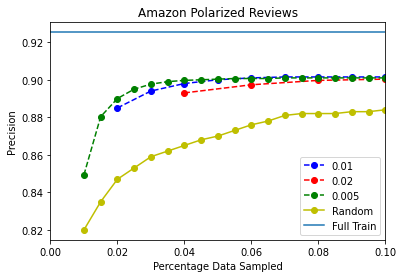

In [70]:
fig, ax = plt.subplots()
plt.xlim(0, 0.10)
ax.plot([0.01 * i for i in range(2, 11)], x, '--bo', label='0.01')
ax.plot([0.02 * i for i in range(2, 6)], y, '--ro', label='0.02') 
ax.plot([0.005 * i for i in range(2, 21)], z, '--go', label='0.005')
ax.plot([0.005 * i for i in range(2, 21)], random, '-yo', label='Random')
ax.plot([0,1], [0.9253214799974958, 0.9253214799974958], linestyle='-', label = 'Full Train')
plt.xlabel("Percentage Data Sampled")
plt.ylabel("Precision")
ax.set_title("Amazon Polarized Reviews")
ax.legend()

In [49]:
f_train = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_train.txt"
f_test = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_test.txt"
with open(f_train, "r") as f:
    train_arr = np.array([s.rstrip("\n").split(" ", 1) for s in f.readlines()])
f.close()

In [51]:
f_test = "C:\\Users\\Tegh\\fasttext\\amazon_reviews\\out_test.txt"

def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    return p

In [73]:
nbdata = [[0.686, 0.5224, 0.538, 0.7392, 0.7732, 0.7902, 0.8032, 0.815, 0.814, 0.8188, 0.8164, 0.8182, 0.8206, 0.8208, 0.8228, 0.824, 0.8264, 0.827, 0.8266, 0.8298],
[0.7076, 0.508, 0.6176, 0.7132, 0.7248, 0.802, 0.8124, 0.8136, 0.8222, 0.821, 0.83, 0.8254, 0.8284, 0.8272, 0.8312, 0.8308, 0.8328, 0.8326, 0.8298, 0.8322],
[0.6822, 0.5008, 0.7502, 0.7574, 0.7572, 0.7332, 0.7836, 0.804, 0.803, 0.8156, 0.8172, 0.8206, 0.8202, 0.829, 0.8228, 0.8272, 0.8282, 0.8288, 0.828, 0.8284],
[0.691, 0.5028, 0.756, 0.7446, 0.7278, 0.7816, 0.8026, 0.8042, 0.8072, 0.8096, 0.8182, 0.8176, 0.8204, 0.8264, 0.8294, 0.828, 0.8258, 0.8274, 0.8304, 0.8334],
[0.586, 0.5004, 0.7652, 0.7718, 0.7478, 0.7834, 0.7872, 0.8012, 0.8096, 0.8146, 0.8132, 0.8184, 0.8198, 0.8206, 0.827, 0.8256, 0.8276, 0.826, 0.825, 0.8312],
[0.5184, 0.5018, 0.755, 0.7786, 0.7926, 0.7978, 0.8132, 0.815, 0.8084, 0.8186, 0.8138, 0.8208, 0.8244, 0.8238, 0.8282, 0.8304, 0.832, 0.831, 0.8298, 0.83],
[0.6394, 0.5004, 0.773, 0.794, 0.78, 0.7824, 0.8074, 0.8104, 0.8106, 0.8168, 0.8162, 0.8208, 0.8146, 0.8224, 0.8246, 0.8232, 0.833, 0.8318, 0.8326, 0.8316],
[0.6502, 0.5214, 0.5404, 0.7622, 0.7832, 0.8018, 0.8102, 0.8158, 0.8168, 0.82, 0.8198, 0.8208, 0.823, 0.8212, 0.8272, 0.8332, 0.8304, 0.832, 0.8342, 0.8362],
[0.6976, 0.5152, 0.5566, 0.6416, 0.784, 0.7954, 0.8156, 0.8126, 0.8172, 0.8232, 0.8242, 0.8252, 0.8288, 0.8324, 0.8306, 0.8342, 0.8284, 0.8324, 0.833, 0.8344],
[0.5182, 0.501, 0.7508, 0.7776, 0.7912, 0.8048, 0.8038, 0.8158, 0.8156, 0.8138, 0.8186, 0.8244, 0.82, 0.8242, 0.8272, 0.8296, 0.8288, 0.8256, 0.8264, 0.8306],
[0.7126, 0.639, 0.5036, 0.7894, 0.7814, 0.7962, 0.814, 0.8154, 0.823, 0.8214, 0.827, 0.8252, 0.8248, 0.8258, 0.8282, 0.8268, 0.824, 0.8312, 0.8312, 0.8344],
[0.703, 0.7412, 0.6626, 0.5434, 0.735, 0.7888, 0.7998, 0.8156, 0.8198, 0.823, 0.8226, 0.8216, 0.8254, 0.8232, 0.8264, 0.8236, 0.8288, 0.827, 0.8326, 0.8288],
[0.6132, 0.5004, 0.7672, 0.7458, 0.712, 0.7754, 0.8032, 0.8154, 0.817, 0.818, 0.818, 0.818, 0.8266, 0.8298, 0.8284, 0.8294, 0.8282, 0.826, 0.8182, 0.829],
[0.6622, 0.501, 0.694, 0.6844, 0.7252, 0.793, 0.8036, 0.8064, 0.8148, 0.8126, 0.8254, 0.8244, 0.8232, 0.831, 0.8256, 0.828, 0.8264, 0.8326, 0.829, 0.8342],
[0.7032, 0.5042, 0.6356, 0.66, 0.7634, 0.7878, 0.7992, 0.8162, 0.8178, 0.8182, 0.8194, 0.8218, 0.8238, 0.8204, 0.8266, 0.826, 0.8262, 0.8282, 0.8284, 0.8314],
[0.7474, 0.5062, 0.7436, 0.7452, 0.783, 0.8074, 0.8246, 0.8274, 0.8364, 0.8372],
[0.7714, 0.7862, 0.668, 0.593, 0.7992, 0.8072, 0.8212, 0.8312, 0.835, 0.8388],
[0.6106, 0.5002, 0.7726, 0.7806, 0.8082, 0.8104, 0.824, 0.8306, 0.8306, 0.8366],
[0.6244, 0.5008, 0.7678, 0.7978, 0.8078, 0.8144, 0.8194, 0.8218, 0.8244, 0.8304],
[0.756, 0.652, 0.5424, 0.7692, 0.8104, 0.8184, 0.8226, 0.8286, 0.8352, 0.8422],
[0.7342, 0.5222, 0.5892, 0.769, 0.8002, 0.8214, 0.8204, 0.8308, 0.8324, 0.8336],
[0.7696, 0.6966, 0.5284, 0.7732, 0.7952, 0.8186, 0.8228, 0.8294, 0.8314, 0.8316],
[0.6258, 0.5006, 0.767, 0.7796, 0.791, 0.8152, 0.8222, 0.8208, 0.8238, 0.8258],
[0.7488, 0.569, 0.5518, 0.7732, 0.8104, 0.8258, 0.8322, 0.8402, 0.8376, 0.8452],
[0.7232, 0.5122, 0.6562, 0.7606, 0.8016, 0.8224, 0.8268, 0.8334, 0.8338, 0.8416],
[0.6298, 0.5016, 0.7876, 0.8068, 0.8196, 0.827, 0.8346, 0.8358, 0.841, 0.8364],
[0.6718, 0.503, 0.7704, 0.797, 0.8082, 0.8204, 0.826, 0.832, 0.8316, 0.8304],
[0.7198, 0.5046, 0.7144, 0.756, 0.783, 0.8246, 0.8264, 0.8284, 0.838, 0.8406],
[0.771, 0.7512, 0.5518, 0.7452, 0.7738, 0.8064, 0.8236, 0.8254, 0.8324, 0.8324],
[0.7578, 0.5638, 0.5422, 0.798, 0.808, 0.824, 0.8268, 0.8306, 0.8348, 0.8372],
[0.7874, 0.6216, 0.6124, 0.8146, 0.8348],
[0.7902, 0.8122, 0.8002, 0.7666, 0.774],
[0.7832, 0.7198, 0.607, 0.8022, 0.8256],
[0.725, 0.519, 0.8028, 0.8134, 0.8308],
[0.7792, 0.6564, 0.592, 0.8204, 0.8362],
[0.7926, 0.8122, 0.8036, 0.7788, 0.7932],
[0.7934, 0.8106, 0.8144, 0.8168, 0.8184],
[0.7118, 0.5122, 0.785, 0.8088, 0.8242],
[0.7398, 0.533, 0.7592, 0.802, 0.8292],
[0.8024, 0.7558, 0.6126, 0.789, 0.8278],
[0.7412, 0.525, 0.774, 0.7964, 0.8286],
[0.7826, 0.6396, 0.6018, 0.8182, 0.8274],
[0.7508, 0.5376, 0.7636, 0.8046, 0.8218],
[0.7566, 0.5628, 0.717, 0.7886, 0.8338],
[0.7062, 0.5202, 0.7878, 0.8102, 0.8246]]

In [81]:
a = np.zeros(9)
for i in range(15,30):
    for j in range(1,10):
        a[j-1] += nbdata[i][j]
for i in range(9):
    a[i] /= 15

In [83]:
b = np.zeros(19)
for i in range(15):
    for j in range(1,20):
        b[j-1] += nbdata[i][j]
for i in range(19):
    b[i] /= 15

In [85]:
c = np.zeros(4)
for i in range(30,45):
    for j in range(1,5):
        c[j-1] += nbdata[i][j]
for i in range(4):
    c[i] /= 15

In [86]:
print(a)
print(b)
print(c)

[0.57134667 0.66356    0.76296    0.79997333 0.81757333 0.82490667
 0.82976    0.83322667 0.836     ]
[0.53066667 0.67105333 0.72688    0.75858667 0.78758667 0.80393333
 0.81177333 0.81446667 0.81768    0.82       0.82154667 0.82293333
 0.82521333 0.82708    0.828      0.82846667 0.82930667 0.82901333
 0.83170667]
[0.63586667 0.72222667 0.80204    0.82202667]


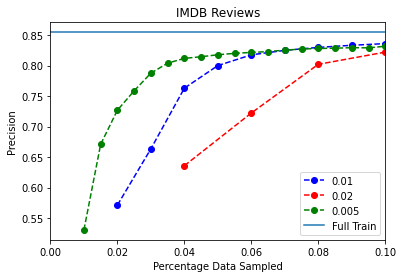

In [89]:
fig2, ax2 = plt.subplots()
plt.xlim(0, 0.10)
ax2.plot([0.01 * i for i in range(2, 11)], a, '--bo', label='0.01')
ax2.plot([0.02 * i for i in range(2, 6)], c, '--ro', label='0.02') 
ax2.plot([0.005 * i for i in range(2, 21)], b, '--go', label='0.005')
# ax2.plot([0.005 * i for i in range(2, 21)],  '-yo', label='Random')
ax2.plot([0,1], [0.8546, 0.8546], linestyle='-', label = 'Full Train')
plt.xlabel("Percentage Data Sampled")
plt.ylabel("Precision")
ax2.set_title("IMDB Reviews")
ax2.legend()